In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
CODE_DIR = os.environ['CODEROOT']
sys.path.append(os.path.join(CODE_DIR, 'VisionCG'))
sys.path.append(os.path.join(CODE_DIR, 'EPypes'))

In [4]:
from visioncg import regions, lines, edges, io, improc, viz, corners, nputil, circles

## Opening a color image

Image dimensions: (258, 604, 3)


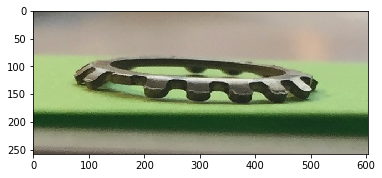

In [5]:
im_swgreen = io.open_image('sw_side_green.jpg', color_transform=cv2.COLOR_BGR2RGB)
print('Image dimensions:', im_swgreen.shape)

_ = plt.imshow(im_swgreen)

## Color channels

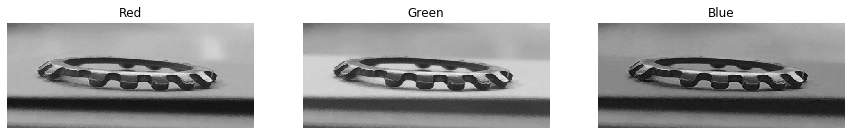

In [6]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(im_swgreen[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Red')

plt.subplot(1, 3, 2)
plt.imshow(im_swgreen[:, :, 1], cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Green')

plt.subplot(1, 3, 3)
plt.imshow(im_swgreen[:, :, 2], cmap='gray', vmin=0, vmax=255)
plt.axis('off')
_ = plt.title('Blue')

## Thresholding - 1

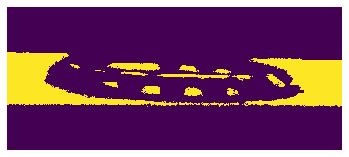

In [7]:
green_t = regions.threshold_binary(im_swgreen[:, :, 1], 200)

_ = plt.imshow(green_t)
_ = plt.axis('off')

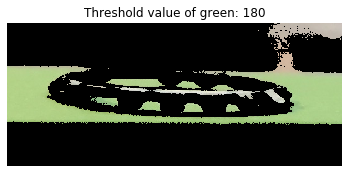

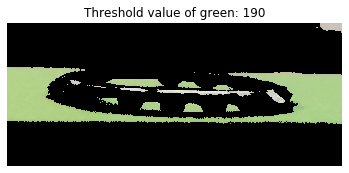

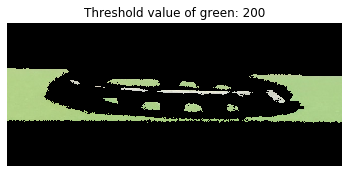

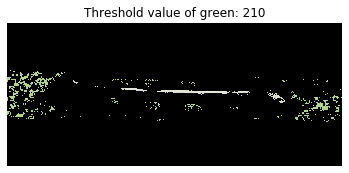

In [8]:
for threshold_value in (180, 190, 200, 210):

    t_mask = regions.threshold_binary(im_swgreen[:, :, 1], threshold_value)

    plt.figure()

    plt.imshow(
        cv2.bitwise_and(im_swgreen, im_swgreen, mask=t_mask)
    )
    plt.title('Threshold value of green: {}'.format(threshold_value))
    _ = plt.axis('off')

## Thresholding - 2 

In [9]:
im_feeder = io.open_image('sw_on_feeder.png', read_flag=cv2.IMREAD_GRAYSCALE)

im_feeder.shape

(768, 1024)

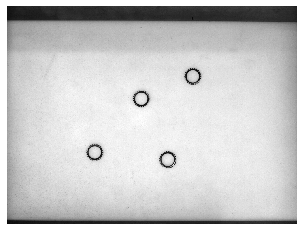

In [10]:
plt.imshow(im_feeder, cmap='gray')
_ = plt.axis('off')

In [11]:
def feeder_threshold(im, thresold_value, y_start=100, y_end=700):
    
    roi = im[y_start:y_end]
    
    return roi < thresold_value

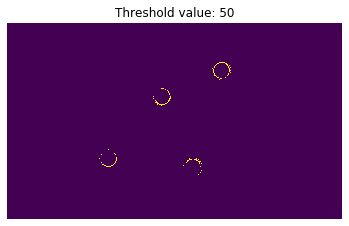

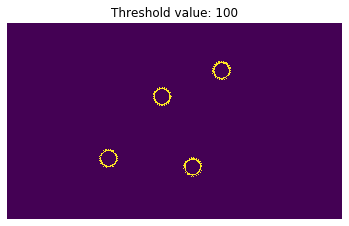

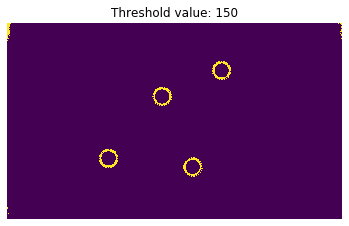

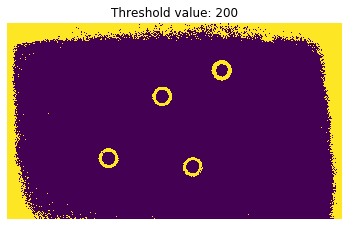

In [12]:
for t in (50, 100, 150, 200):

    im_t = feeder_threshold(im_feeder, thresold_value=t)
    
    plt.figure()
    plt.imshow(im_t)
    plt.axis('off')
    plt.title('Threshold value: {}'.format(t))